In [6]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import pickle
%matplotlib inline  

In [15]:
FREQ_DIST_FILE = '../code/train_data_modified-processed-freqdist.pkl'
BI_FREQ_DIST_FILE = '../code/train_data_modified-processed-freqdist-bi.pkl'

In [16]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('modi', 83008),
 ('the', 64282),
 ('and', 41682),
 ('for', 31300),
 ('you', 23425),
 ('are', 17580),
 ('that', 17460),
 ('not', 17430),
 ('india', 17410),
 ('this', 17206),
 ('will', 17206),
 ('with', 12708),
 ('has', 12404),
 ('have', 12282),
 ('but', 11685),
 ('all', 11069),
 ('his', 10083),
 ('was', 9936),
 ('from', 9346),
 ('they', 9100)]

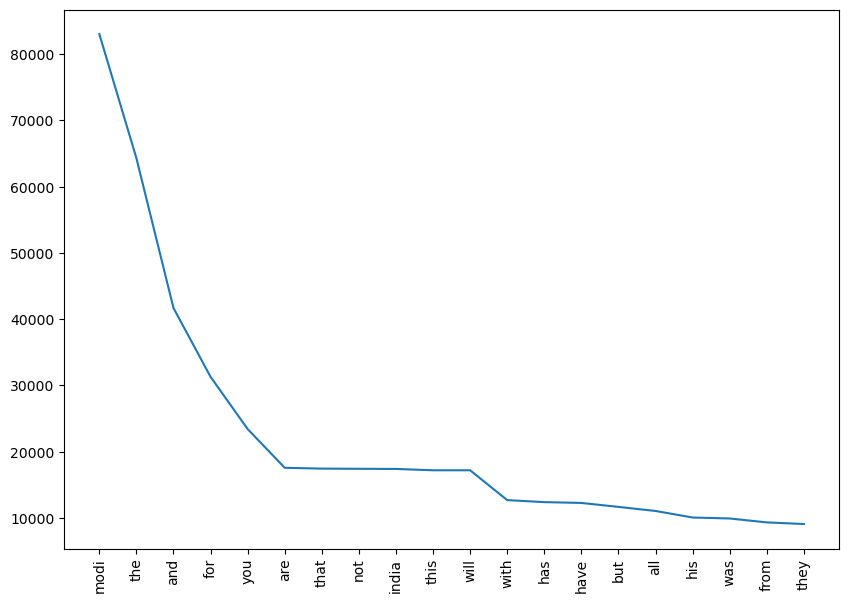

In [17]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in unigrams])
my_xticks = [i[0] for i in unigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [18]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('narendra', 'modi'), 5280),
 (('you', 'are'), 3204),
 (('modi', 'and'), 3005),
 (('for', 'the'), 2848),
 (('for', 'modi'), 2833),
 (('modi', 'govt'), 2808),
 (('modi', 'has'), 2599),
 (('vote', 'for'), 2455),
 (('prime', 'minister'), 2283),
 (('modi', 'will'), 1797),
 (('all', 'the'), 1714),
 (('rahul', 'gandhi'), 1683),
 (('the', 'nation'), 1642),
 (('the', 'country'), 1623),
 (('that', 'modi'), 1588),
 (('modi', 'for'), 1554),
 (('they', 'are'), 1551),
 (('and', 'modi'), 1501),
 (('modi', 'the'), 1498),
 (('modi', 'government'), 1401)]

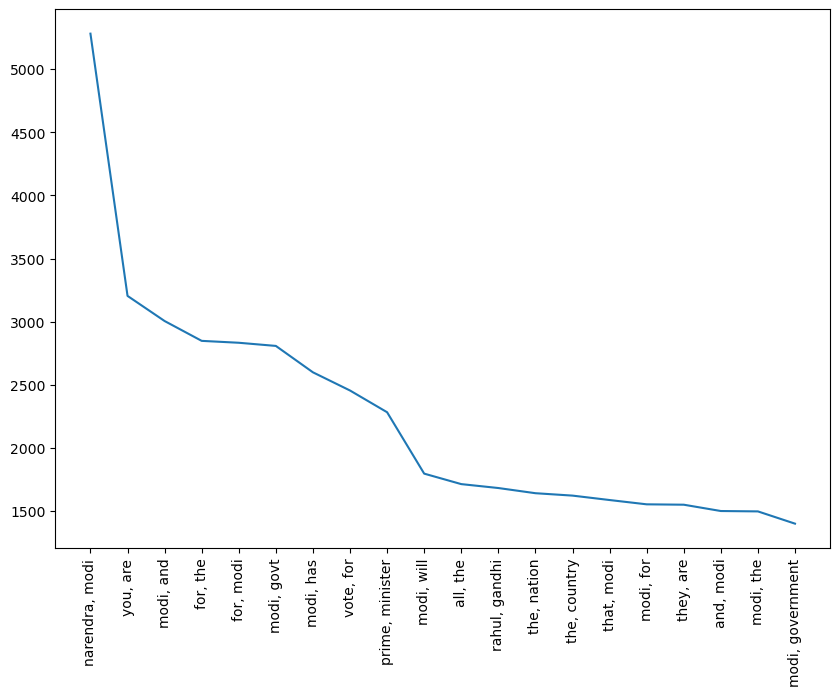

In [20]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in bigrams])
my_xticks = [', '.join(i[0]) for i in bigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [21]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([-0.76395472, 11.39856527])

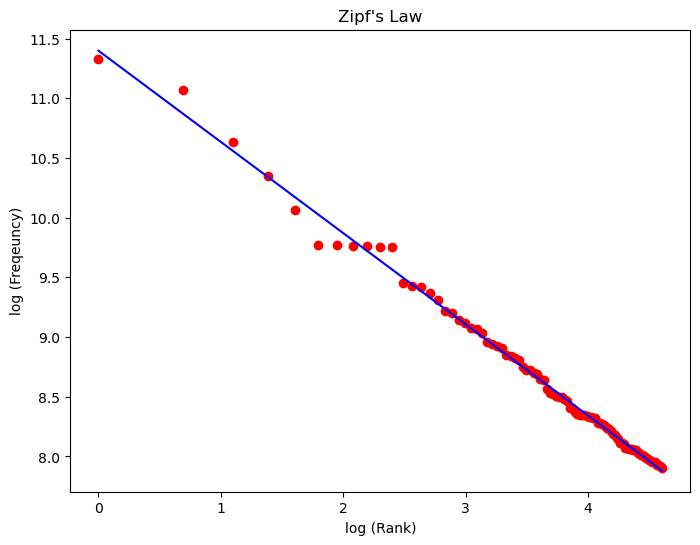

In [22]:
plt.figure(3, [8,6])
plt.plot(log_ranks, log_freqs, 'ro')
plt.plot(log_ranks,p(log_ranks),'b-')
plt.xlabel('log (Rank)')
plt.ylabel('log (Freqeuncy)')
plt.title('Zipf\'s Law')
plt.show()

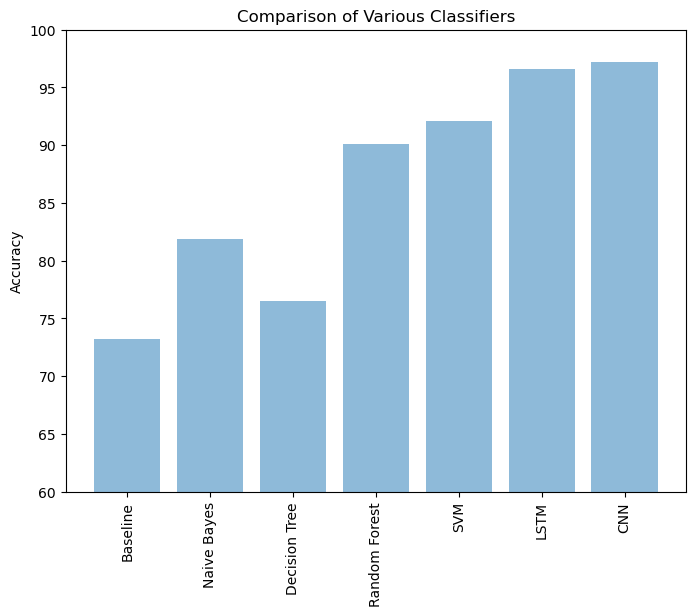

In [24]:
classifiers = ['Baseline', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'LSTM', 'CNN']
accuracies = [73.21, 81.86, 76.48, 90.11, 92.05, 96.54, 97.19]
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers, rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([60, 100])
plt.show()